# Building data on Munich

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import contextily as ctx
import random

## Data Pre-Processing

In [2]:
#Read Excel-Sheet
data = pd.read_excel('EnergyPerBuilding_Munich-2015-0_0.xlsx')
data.head(10)

,Munich,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,bid,footprint_area,use,free_walls,lon,lat,dist_to_heat_source,year_class,size_class,floors,...,sh_demand,solar_gains,int_gains,sh_demand_per_h_area,solar_gains_per_h_area,int_gains_per_h_area,hw_demand,hw_demand_m3,total_demand,total_demand_per_h_area
1,7,71.52,3,4,48.1757,11.3836,0,10,0,2,...,1.06766e+07,2.34068e+06,2305086,93300.9,20454.8,20143.7,1.02051e+06,16.23,1.16971e+07,102219
2,46,54.03,3,2,48.1749,11.3876,0,8,1,2,...,8.22951e+06,1.79002e+06,800274,95196,20706.3,9257.29,1.01971e+06,16.24,9.24922e+06,106992
3,14,77.41,3,4,48.1746,11.3852,0,8,0,2,...,1.45455e+07,2.93739e+06,1671120,117439,23716.2,13492.4,1.13483e+06,18.03,1.56803e+07,126601
4,16,181.46,3,4,48.1752,11.3862,0,9,0,2,...,2.78205e+07,5.18657e+06,3535632,95821.8,17864,12177.7,1.68073e+06,26.74,2.95012e+07,101611
5,0,61.42,3,4,48.176,11.3826,0,10,0,2,...,8.55143e+06,1.64538e+06,710146,87018,16743.1,7226.33,1.6766e+06,26.74,1.0228e+07,104079
6,13,226.78,3,4,48.1739,11.3851,0,5,0,1,...,2.9671e+07,4.0677e+06,1461376,163545,22421,8055.03,2.03897e+06,32.36,3.17099e+07,174784
7,19,154.17,3,4,48.1754,11.3856,0,9,0,2,...,2.63965e+07,4.7159e+06,2375634,107010,19118.1,9630.74,1.7169e+06,27.33,2.81134e+07,113971
8,33,113.91,3,4,48.1739,11.3862,0,9,0,2,...,1.92795e+07,3.28788e+06,770970,105782,18039.9,4230.15,1.67649e+06,26.74,2.0956e+07,114981
9,2,154.24,3,4,48.1758,11.3828,0,10,0,2,...,2.76797e+07,5.45865e+06,812658,112162,22119.2,3292.99,2.69473e+06,42.99,3.03744e+07,123081


In [3]:
#Formatting
data.columns = data.iloc[0]
data = data.iloc[1:]
data.head(10)

,bid,footprint_area,use,free_walls,lon,lat,dist_to_heat_source,year_class,size_class,floors,...,sh_demand,solar_gains,int_gains,sh_demand_per_h_area,solar_gains_per_h_area,int_gains_per_h_area,hw_demand,hw_demand_m3,total_demand,total_demand_per_h_area
1,7,71.52,3,4,48.1757,11.3836,0,10,0,2,...,1.06766e+07,2.34068e+06,2305086,93300.9,20454.8,20143.7,1.02051e+06,16.23,1.16971e+07,102219
2,46,54.03,3,2,48.1749,11.3876,0,8,1,2,...,8.22951e+06,1.79002e+06,800274,95196,20706.3,9257.29,1.01971e+06,16.24,9.24922e+06,106992
3,14,77.41,3,4,48.1746,11.3852,0,8,0,2,...,1.45455e+07,2.93739e+06,1671120,117439,23716.2,13492.4,1.13483e+06,18.03,1.56803e+07,126601
4,16,181.46,3,4,48.1752,11.3862,0,9,0,2,...,2.78205e+07,5.18657e+06,3535632,95821.8,17864,12177.7,1.68073e+06,26.74,2.95012e+07,101611
5,0,61.42,3,4,48.176,11.3826,0,10,0,2,...,8.55143e+06,1.64538e+06,710146,87018,16743.1,7226.33,1.6766e+06,26.74,1.0228e+07,104079
6,13,226.78,3,4,48.1739,11.3851,0,5,0,1,...,2.9671e+07,4.0677e+06,1461376,163545,22421,8055.03,2.03897e+06,32.36,3.17099e+07,174784
7,19,154.17,3,4,48.1754,11.3856,0,9,0,2,...,2.63965e+07,4.7159e+06,2375634,107010,19118.1,9630.74,1.7169e+06,27.33,2.81134e+07,113971
8,33,113.91,3,4,48.1739,11.3862,0,9,0,2,...,1.92795e+07,3.28788e+06,770970,105782,18039.9,4230.15,1.67649e+06,26.74,2.0956e+07,114981
9,2,154.24,3,4,48.1758,11.3828,0,10,0,2,...,2.76797e+07,5.45865e+06,812658,112162,22119.2,3292.99,2.69473e+06,42.99,3.03744e+07,123081
10,23,57.96,3,4,48.1748,11.3862,0,7,0,2,...,1.84841e+07,2.64308e+06,1805924,199320,28501.1,19473.8,2.03897e+06,32.36,2.05231e+07,221307


In [4]:
#Slice for relevant attributes (here coordinates)
geo_coordinates = data.loc[:, ['lon','lat']]
geo_coordinates.head(10)

,lon,lat
1,48.1757,11.3836
2,48.1749,11.3876
3,48.1746,11.3852
4,48.1752,11.3862
5,48.176,11.3826
6,48.1739,11.3851
7,48.1754,11.3856
8,48.1739,11.3862
9,48.1758,11.3828
10,48.1748,11.3862


In [22]:
#Format to correct data type
cols = geo_coordinates.select_dtypes(exclude=['float']).columns
geo_coordinates[cols] = geo_coordinates[cols].apply(pd.to_numeric, downcast='float', errors='coerce')


## K-Means Clustering

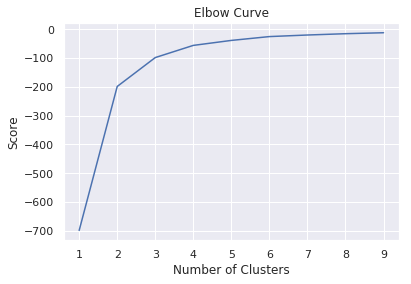

In [6]:
# Calculate the optimal amount of clusters with Elbow method
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = geo_coordinates[['lat']]
X_axis = geo_coordinates[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [18]:
#K-Means algorithm implementation
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(geo_coordinates) # Compute k-means clustering.
geo_coordinates['cluster_label'] = kmeans.fit_predict(geo_coordinates)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(geo_coordinates) # Labels of each point
geo_coordinates.head(10)

,lon,lat,cluster_label
1,48.175716,11.383578,1
2,48.174908,11.387557,1
3,48.174618,11.385216,1
4,48.175198,11.386161,1
5,48.175972,11.382558,1
6,48.173901,11.385131,1
7,48.175365,11.385581,1
8,48.173935,11.386213,1
9,48.175808,11.382796,1
10,48.174820,11.386216,1


In [21]:
# Visualize the clustering results (as the data is too big for a viz, slice it randomly with an index range)
random_ind1 = int(random.random()*geo_coordinates.shape[0])
random_ind2 = int(random.random()*geo_coordinates.shape[0])

ax = geo_coordinates[random_ind1:random_ind2].plot.scatter(x = 'lon', y = 'lat', c=labels[random_ind1:random_ind2], s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
#ctx.add_basemap(ax)


ValueError: scatter requires x column to be numeric

In [20]:
np.unique(labels)

array([0, 1, 2], dtype=int32)